In [2]:
import pandas as pd

results = pd.read_csv("/Users/nathanharms/PycharmProjects/peptide-agent/tests/topk100_batchsize40_gemini2.5pro.csv")

In [3]:
results

,row_index,peptide_code,morphology,gt_PH,gt_CONCENTRATION_mgml,gt_CONC_LOG,gt_CONC_BUCKET,gt_TEMPERATURE_C,gt_SOLVENT_raw,gt_SOLVENT_norm,...,pred_TEMPERATURE_C,pred_SOLVENT,pred_TIME_MINUTES,score_PH,score_CONC,score_TEMP,score_SOLV,score_TIME,score_TOTAL,report
0,0,FEFEPKFKF,fiber,3.5,32.025,1.505489,"(1,2]",NaN,water,water,...,"(20,25]",Water,"(240,2880]",1,1,1,1,1,5,"PH: (1,5]\nConcentration (log M): (1,2]\nTempe..."
1,1,FF,fiber,6.7,15.000,1.176091,"(1,2]",25.0,H2O,water,...,"(20,25]",Water,"(240,2880]",1,1,1,1,1,5,"PH: (6.5,7.5]\nConcentration (log M): (1,2]\nT..."
2,2,FEFEFKFK,fiber,6.5,7.847,0.894704,"(0,1]",90.0,water,water,...,"(37,90]",Water,"(240,2880]",1,1,1,1,1,5,"PH: (5,7.5]\nConcentration (log M): (0,1]\nTem..."
3,3,FEFKFEFK,fiber,6.5,7.847,0.894704,"(0,1]",90.0,water,water,...,"(37,90]",Water,"(240,2880]",1,1,1,1,1,5,"PH: (5,7.5]\nConcentration (log M): (0,1]\nTem..."
4,4,KFG,sphere,7.4,5.000,0.698970,"(0,1]",80.0,H2O,water,...,"(20,37]",Water,"(240,2880]",1,0,0,1,1,3,"PH: (6.5,7.5]\nConcentration (log M): (-1,1]\n..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,193,FF,fiber,3.2,8.020,0.904174,"(0,1]",25.0,H2O,water,...,"(20,25]",Water,"(240,2880]",0,1,1,1,0,3,"PH: (6.5,7.5]\nConcentration (log M): (0,1]\nT..."
194,194,FF,fiber,3.4,8.020,0.904174,"(0,1]",25.0,H2O,water,...,"(20,25]",Water,"(240,2880]",0,1,1,1,0,3,"PH: (6.5,7.5]\nConcentration (log M): (0,1]\nT..."
195,195,FF,fiber,3.8,8.020,0.904174,"(0,1]",25.0,H2O,water,...,"(20,25]",Water,"(240,2880]",0,1,1,1,0,3,"PH: (6.5,7.5]\nConcentration (log M): (0,1]\nT..."
196,196,FF,none,10.9,15.000,1.176091,"(1,2]",25.0,H2O,water,...,"(20,25]",Dimethylformamide,"(240,2880]",0,1,1,0,1,3,"PH: (6.5,7.5]\nConcentration (log M): (1,2]\nT..."


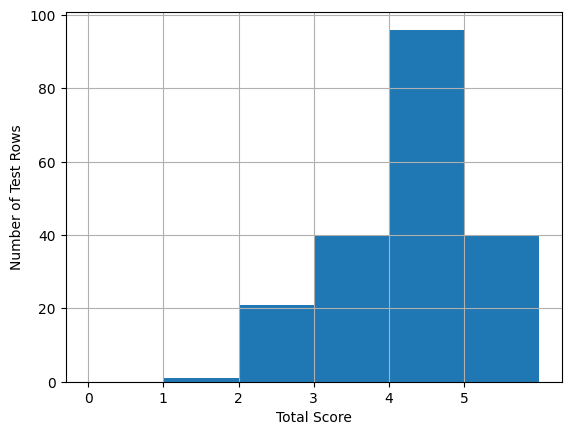

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
results["score_TOTAL"].hist(ax=ax, bins=[0,1,2,3,4,5,6])
ax.set_xticks([0,1,2,3,4,5])
ax.set_ylabel("Number of Test Rows")
ax.set_xlabel("Total Score")
fig.savefig("total_dist.png", bbox_inches="tight")

score_PH
1    0.818182
0    0.181818
Name: count, dtype: float64
score_CONC
1    0.722222
0    0.277778
Name: count, dtype: float64
score_TEMP
1    0.868687
0    0.131313
Name: count, dtype: float64
score_SOLV
0    0.525253
1    0.474747
Name: count, dtype: float64
score_TIME
1    0.888889
0    0.111111
Name: count, dtype: float64


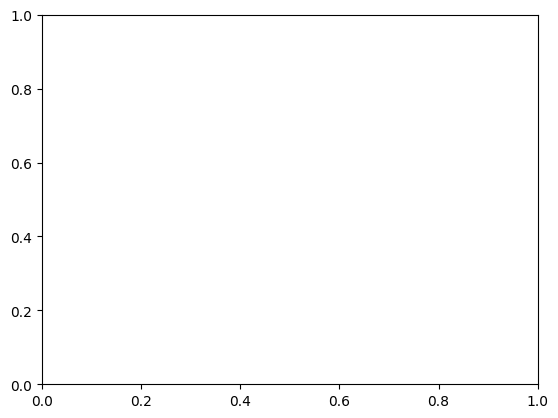

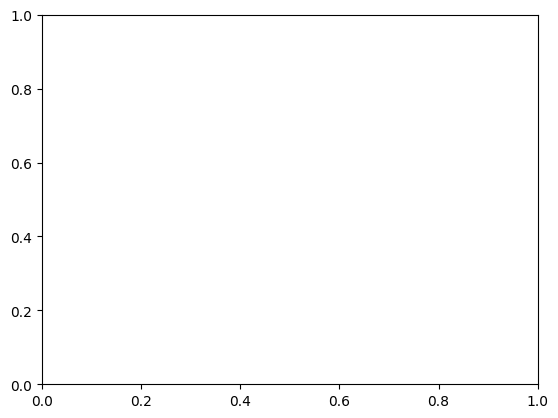

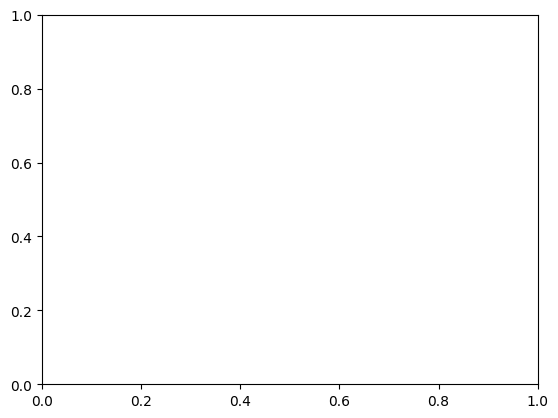

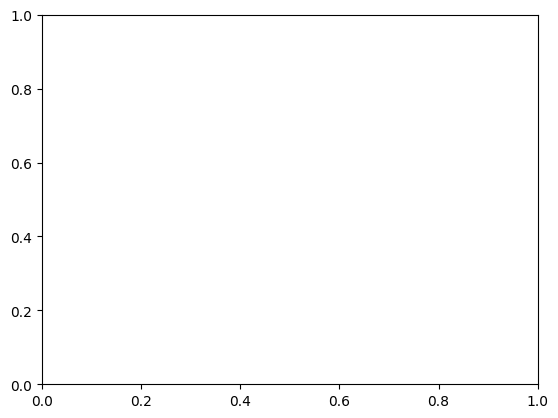

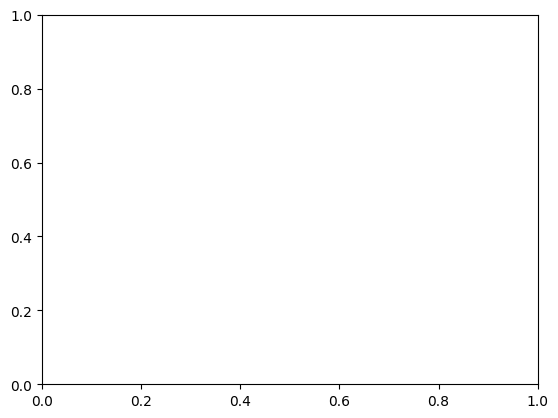

In [27]:
for x in ["PH", "CONC", "TEMP", "SOLV", "TIME"]:
    fig, ax = plt.subplots()

    print(results[f"score_{x}"].value_counts() / results.shape[0])# .hist(ax=ax, bins=[0,1,2], density=True)
    # ax.set_xticks([0,1,2])
    # ax.set_ylabel("Number of Test Rows")
    # ax.set_xlabel(f"Score: {x}")
    # ax.set_ylim(0, 1)
    # fig.savefig(f"{x}_dist.png", bbox_inches="tight")
